## Regression- Predicting continous values

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## create a regression dataset

In [2]:
from sklearn.datasets import make_regression
X,Y=make_regression(n_samples=5000,n_features=30,n_informative=25,noise=10,random_state=42)

In [3]:
X

array([[-1.05245683, -0.94496269, -1.79989659, ..., -1.83442393,
        -0.07956011,  1.20745263],
       [-0.84747383,  0.31840811,  0.24796167, ..., -0.2390554 ,
        -0.69763862,  1.31984005],
       [-0.94602775,  0.2383774 , -1.6176638 , ..., -0.09142036,
        -0.74652074, -2.21823553],
       ...,
       [-0.22097737,  1.14453288, -0.39354952, ..., -0.90184457,
        -0.07424546, -0.2463316 ],
       [-0.95614616,  0.03256098, -1.12885675, ..., -0.00963513,
        -1.43734832,  0.63541106],
       [ 1.51114116, -0.00270833, -1.26097476, ..., -0.15650465,
         0.50981791,  1.19398227]])

In [4]:
Y

array([-232.93639282, -144.45063306,  -30.67109763, ...,  143.2968639 ,
       -248.32988778,  -19.83229819])

In [5]:
X.shape

(5000, 30)

## Save X and Y in dataframe

In [6]:
cols=[f'x{i+1}' for i in range(30)]
cols

['x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30']

In [7]:
import pandas as pd
X=pd.DataFrame(X,columns=cols)
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,-1.052457,-0.944963,-1.799897,-0.034799,-1.482409,1.613543,-0.748163,-0.645310,1.063117,-1.335465,...,-0.398323,0.326932,2.042239,-0.301699,-1.361063,1.454857,-0.066823,-1.834424,-0.079560,1.207453
1,-0.847474,0.318408,0.247962,0.176165,0.550274,-0.695864,0.599538,-0.050914,1.363157,-1.201647,...,-1.368967,-0.403174,0.125837,-1.231097,-0.042579,-0.293594,-0.505876,-0.239055,-0.697639,1.319840
2,-0.946028,0.238377,-1.617664,-2.253756,-1.057629,-0.011553,1.400647,0.990803,-0.262228,-0.396235,...,-0.400736,0.007432,0.219753,2.205187,0.746020,-0.175596,-1.132978,-0.091420,-0.746521,-2.218236
3,-0.365222,0.004347,1.459301,1.650519,-3.114990,0.718841,1.669763,0.594568,0.350614,-0.528732,...,0.587610,0.050495,0.692244,0.492412,-0.118160,0.151945,-0.299890,1.009559,-0.779756,1.105541
4,-0.937119,0.038862,0.267291,-2.321520,-0.519995,1.281711,-0.447109,1.847404,-0.179080,0.073799,...,-0.985717,0.734585,-0.870311,0.316585,0.373045,-0.594102,-1.388615,1.262913,-0.668793,-0.049186


In [8]:
Y=pd.DataFrame(Y,columns=['Y'])

In [9]:
Y

,Y
0,-232.936393
1,-144.450633
2,-30.671098
3,165.764197
4,-252.068764
...,...
4995,337.924300
4996,587.266360
4997,143.296864
4998,-248.329888


## Create a preprocessing Pipeline for X

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [11]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                         ('scaler',StandardScaler())])

In [12]:
X_pre=num_pipe.fit_transform(X)
X_pre

array([[-1.00877542, -0.96849615, -1.8356222 , ..., -1.84743596,
        -0.06441693,  1.19633814],
       [-0.80656544,  0.30321775,  0.22782616, ..., -0.25077076,
        -0.67948802,  1.30863615],
       [-0.90378611,  0.22265853, -1.6520021 , ..., -0.10301574,
        -0.72813229, -2.22662492],
       ...,
       [-0.1885443 ,  1.13479811, -0.41856878, ..., -0.91409862,
        -0.05912814, -0.25628963],
       [-0.91376764,  0.01548293, -1.15947382, ..., -0.02116403,
        -1.41559849,  0.62475162],
       [ 1.52014196, -0.02001929, -1.29259762, ..., -0.16815292,
         0.52209333,  1.18287849]])

In [14]:
cols=num_pipe.get_feature_names_out()

In [15]:
cols

array(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30'], dtype=object)

In [16]:
X_pre=pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,-1.008775,-0.968496,-1.835622,-0.032196,-1.485420,1.614947,-0.747164,-0.627734,1.038359,-1.340893,...,-0.418507,0.322752,2.071710,-0.324901,-1.342910,1.406812,-0.052268,-1.847436,-0.064417,1.196338
1,-0.806565,0.303218,0.227826,0.179320,0.577043,-0.684461,0.585446,-0.053781,1.334905,-1.205877,...,-1.393646,-0.402106,0.132047,-1.271369,-0.027103,-0.319448,-0.496045,-0.250771,-0.679488,1.308636
2,-0.903786,0.222659,-1.652002,-2.256956,-1.054417,-0.003112,1.377584,0.952108,-0.271556,-0.393252,...,-0.420931,0.005548,0.227103,2.228029,0.759895,-0.202948,-1.129894,-0.103016,-0.728132,-2.226625
3,-0.330838,-0.012918,1.448387,1.657530,-3.141920,0.724120,1.643688,0.569500,0.334151,-0.526935,...,0.571991,0.048302,0.705328,0.483796,-0.102530,0.120436,-0.287843,0.998859,-0.761205,1.094508
4,-0.894998,0.021825,0.247303,-2.324897,-0.508906,1.284552,-0.449481,1.779248,-0.189376,0.080993,...,-1.008621,0.727476,-0.876193,0.304739,0.387677,-0.616143,-1.388281,1.252419,-0.650783,-0.059300


# Train test Split

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [18]:
xtrain.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
4227,0.274306,-2.243030,0.307393,2.279325,-0.849919,-0.499417,0.063387,0.322236,-0.279113,-1.485297,...,-0.435550,0.016456,-0.478773,0.826978,0.348374,0.203044,-0.974020,1.133163,0.644459,1.026561
4676,-0.110889,-2.308274,-0.306657,-2.797217,0.744218,-1.215240,0.092720,-0.881949,0.099739,-0.153516,...,0.684150,-0.050237,0.659385,0.950390,-2.264741,-0.934321,-0.207092,-1.429908,0.477449,-0.143864
800,-0.534724,0.341340,-0.318392,1.233363,1.778518,0.298750,0.083038,0.104657,0.121582,1.150535,...,2.105502,0.100787,0.150310,0.796843,0.088543,1.044029,-0.691462,0.027791,-0.467562,1.088671
3671,-0.366200,1.081039,-0.920495,-1.060692,-0.616689,0.923926,1.178280,-2.049797,-0.133985,-1.437462,...,0.375930,0.799287,-1.524107,-0.213573,1.841831,-0.235666,-1.623648,0.003545,2.453793,-0.826658
4193,-0.834782,1.471498,-1.414701,-0.704299,2.131088,-0.208189,0.823199,0.547557,0.462746,-1.556602,...,-1.605144,0.394171,0.414800,0.015313,-1.559552,0.776827,-1.919909,1.235952,-1.425568,0.749621


In [19]:
ytrain.head()

,Y
4227,421.295025
4676,-469.452726
800,42.172815
3671,114.083914
4193,-217.535707


In [20]:
xtest.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
1501,0.523841,0.380018,1.397668,1.832757,-0.050539,-0.370155,-0.415394,-1.015830,-0.468665,1.118904,...,-1.087076,0.280815,1.197157,-0.330182,-0.384110,0.456972,0.408793,0.229924,0.065080,-0.460325
2586,0.427962,0.736934,-1.337873,-0.286005,1.022151,-1.001614,1.835519,-1.545811,0.770498,0.293343,...,-0.316910,0.912012,-0.200186,0.895191,-1.340780,-0.398981,-1.299802,-1.160043,0.238474,-0.353788
2653,-1.237790,0.022987,0.591727,0.153331,-1.080162,0.695919,-0.224618,-1.372016,-0.465166,2.577988,...,0.420588,-0.927035,-1.260994,-0.041976,0.559996,-0.025339,0.715960,-2.211627,-0.158048,0.088334
1055,1.163302,0.829281,-0.052936,0.871349,0.526932,-0.469475,0.681055,2.525169,0.805937,-0.311984,...,-0.363881,-1.270352,-0.114835,-0.838927,0.522602,0.531030,-0.113249,-0.130759,-1.530358,0.355058
705,-0.916867,-0.873641,0.964425,-3.404521,-0.352093,0.141089,0.059867,-0.401822,0.274345,1.985234,...,-0.846910,1.259358,-0.624477,0.947502,0.249482,-0.340038,-0.624088,0.983280,1.321964,0.613101


In [21]:
ytest.head()

,Y
1501,297.782677
2586,-55.418700
2653,-181.896454
1055,210.251382
705,188.412050


In [23]:
xtrain.shape

(4000, 30)

In [24]:
xtest.shape

(1000, 30)

In [25]:
xtrain.shape[1]

30

## Create a neural network with keras

In [26]:
from keras.models import Sequential
from keras.layers import Dense

In [27]:
#  Initalize sequential model
model=Sequential()

#Hidden Layer 1
model.add(Dense(64,activation='relu',input_dim=xtrain.shape[1]))
#Hidden Layer 2
model.add(Dense(32,activation='relu'))
#output layer
model.add(Dense(1,activation='linear'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile the model

In [29]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

## Training the neural network

In [30]:
hist=model.fit(xtrain,ytrain,validation_split=0.2,epochs=100)

Epoch 1/100


100/100 [==============================] - 6s 22ms/step - loss: 67131.6562 - mae: 207.6540 - val_loss: 68964.9062 - val_mae: 209.2387
Epoch 2/100
100/100 [==============================] - 1s 11ms/step - loss: 57563.0938 - mae: 191.1990 - val_loss: 46397.0039 - val_mae: 168.9710
Epoch 3/100
100/100 [==============================] - 1s 10ms/step - loss: 24388.7754 - mae: 115.5603 - val_loss: 8449.1914 - val_mae: 64.3666
Epoch 4/100
100/100 [==============================] - 1s 12ms/step - loss: 3010.9773 - mae: 36.2530 - val_loss: 1239.4231 - val_mae: 25.5135
Epoch 5/100
100/100 [==============================] - 1s 10ms/step - loss: 771.1008 - mae: 20.8730 - val_loss: 608.9075 - val_mae: 18.7012
Epoch 6/100
100/100 [==============================] - 1s 11ms/step - loss: 465.2006 - mae: 16.6037 - val_loss: 457.5031 - val_mae: 16.2285
Epoch 7/100
100/100 [==============================] - 1s 11ms/step - loss: 401.7733 - mae: 15.5740 - val_loss: 415.8344 - val_mae: 15.8339


In [31]:
hist.history['loss']

[67131.65625,
 57563.09375,
 24388.775390625,
 3010.977294921875,
 771.100830078125,
 465.20062255859375,
 401.7733154296875,
 374.4605712890625,
 356.07659912109375,
 336.9841003417969,
 319.4101867675781,
 300.7155456542969,
 283.2875671386719,
 268.5317077636719,
 251.8533935546875,
 239.626953125,
 222.44664001464844,
 209.12429809570312,
 196.1074981689453,
 185.23390197753906,
 173.53529357910156,
 163.7630157470703,
 153.40390014648438,
 145.16542053222656,
 137.82888793945312,
 130.8334197998047,
 123.3106918334961,
 118.5330581665039,
 113.75860595703125,
 109.3915023803711,
 106.79405975341797,
 102.15642547607422,
 99.64478302001953,
 96.68161010742188,
 94.53955078125,
 92.76321411132812,
 91.84065246582031,
 88.99333190917969,
 88.5162582397461,
 86.94483184814453,
 85.85022735595703,
 84.6711654663086,
 83.47052001953125,
 82.84232330322266,
 81.77009582519531,
 80.12925720214844,
 79.13229370117188,
 79.55696868896484,
 77.14334106445312,
 79.3108139038086,
 77.436408996

In [32]:
hist.history['val_loss']

[68964.90625,
 46397.00390625,
 8449.19140625,
 1239.423095703125,
 608.907470703125,
 457.5030517578125,
 415.8344421386719,
 387.9277038574219,
 376.2331237792969,
 356.2558898925781,
 343.1933898925781,
 319.8651428222656,
 314.786865234375,
 296.7046813964844,
 282.5523376464844,
 261.42950439453125,
 252.91644287109375,
 242.24058532714844,
 229.30943298339844,
 220.64830017089844,
 211.00222778320312,
 201.7499237060547,
 198.2174835205078,
 186.14662170410156,
 180.4430694580078,
 173.9232177734375,
 167.74693298339844,
 163.5676727294922,
 159.33001708984375,
 158.1930389404297,
 150.66004943847656,
 146.97193908691406,
 146.6829071044922,
 144.65037536621094,
 141.79620361328125,
 140.8866729736328,
 139.00759887695312,
 138.5842742919922,
 143.41087341308594,
 136.687255859375,
 135.41429138183594,
 141.3365020751953,
 136.1544952392578,
 135.6973419189453,
 134.1057586669922,
 133.55152893066406,
 130.5242919921875,
 134.25732421875,
 132.41033935546875,
 135.8748016357422,


In [33]:
hist.history['val_mae']

[209.23870849609375,
 168.97103881835938,
 64.3666000366211,
 25.51351547241211,
 18.701152801513672,
 16.22852325439453,
 15.833928108215332,
 15.465673446655273,
 14.966469764709473,
 14.674405097961426,
 14.534987449645996,
 14.041040420532227,
 13.675281524658203,
 13.824749946594238,
 13.48613166809082,
 12.805794715881348,
 12.6129732131958,
 12.257840156555176,
 12.042372703552246,
 11.828875541687012,
 11.582006454467773,
 11.281023979187012,
 11.069466590881348,
 10.928062438964844,
 10.651449203491211,
 10.485097885131836,
 10.387150764465332,
 10.170434951782227,
 10.117295265197754,
 9.992104530334473,
 9.847702980041504,
 9.7197265625,
 9.739616394042969,
 9.682711601257324,
 9.549430847167969,
 9.509939193725586,
 9.401324272155762,
 9.424335479736328,
 9.588644027709961,
 9.378081321716309,
 9.290120124816895,
 9.508840560913086,
 9.33804988861084,
 9.262886047363281,
 9.273489952087402,
 9.23571491241455,
 9.18393325805664,
 9.20173454284668,
 9.242898941040039,
 9.3208

# plot the learning curve

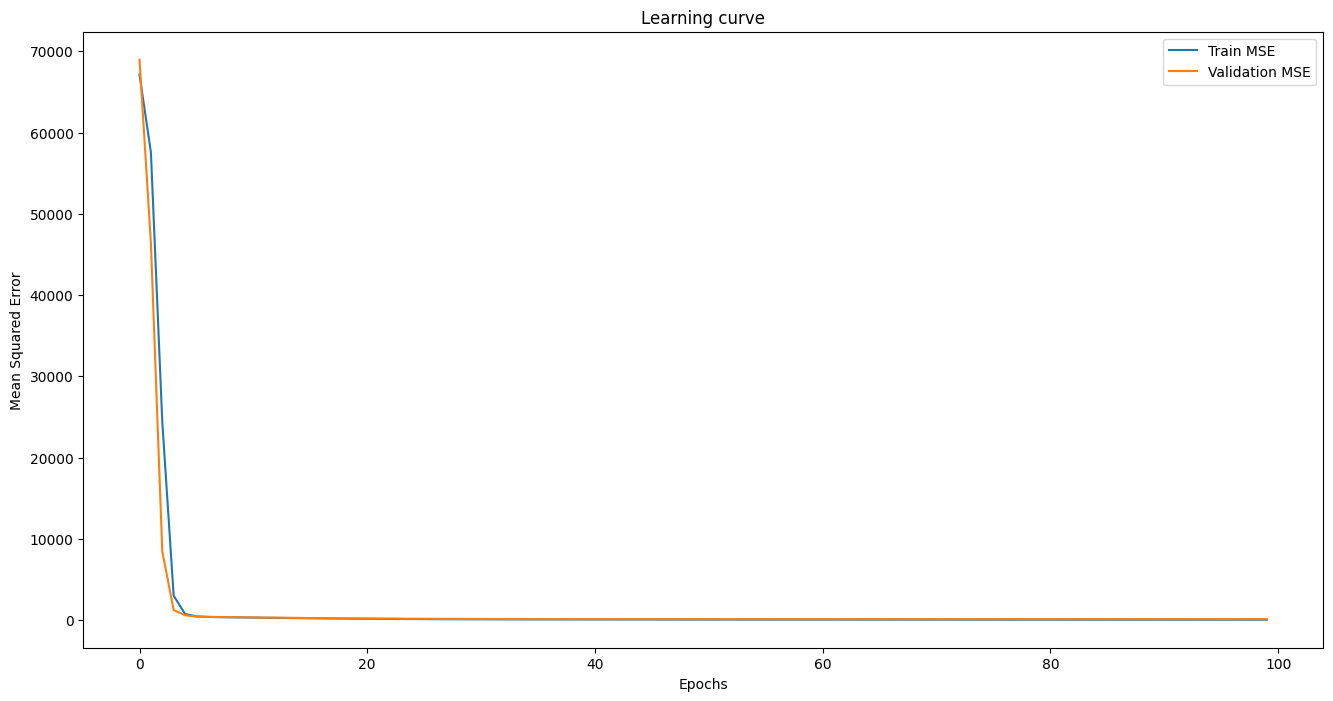

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='Train MSE')
plt.plot(hist.history['val_loss'],label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Learning curve')
plt.legend()
plt.show()

## Evaluate the model

In [35]:
model.evaluate(xtrain,ytrain)

125/125 [==============================] - 1s 5ms/step - loss: 69.6859 - mae: 6.4299


[69.6859130859375, 6.429903984069824]

In [36]:
model.evaluate(xtest,ytest)

32/32 [==============================] - 1s 4ms/step - loss: 126.3268 - mae: 8.9143


[126.32677459716797, 8.914347648620605]

# Predict train and test


In [37]:
ypred_tr=model.predict(xtrain)
ypred_ts=model.predict(xtest)

32/32 [==============================] - 0s 4ms/step


In [38]:
ypred_tr[0:5]

array([[ 419.75586 ],
       [-458.04587 ],
       [  37.173313],
       [ 115.65783 ],
       [-221.12163 ]], dtype=float32)

In [39]:
ytrain.head()

,Y
4227,421.295025
4676,-469.452726
800,42.172815
3671,114.083914
4193,-217.535707


In [40]:
ypred_ts[0:5]

array([[ 304.79837],
       [ -67.77373],
       [-195.06602],
       [ 243.31781],
       [ 177.13832]], dtype=float32)

In [41]:
ytest.head()

,Y
1501,297.782677
2586,-55.418700
2653,-181.896454
1055,210.251382
705,188.412050


In [42]:
# show r2 score in train and test
from sklearn.metrics import r2_score
tr_r2=r2_score(ytrain,ypred_tr)
print(f'Traning R2:{tr_r2:.4f}')

Traning R2:0.9990


In [43]:
ts_r2=r2_score(ytest,ypred_ts)
print(f'Testing R2:{ts_r2:.4f}')

Testing R2:0.9983


## Save the model for future


In [44]:
model.save('ExampleRegression.keras')

## Loading the model

In [45]:
from keras.models import load_model

In [46]:
nn=load_model('ExampleRegression.keras')

In [48]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4097 (16.00 KB)
Trainable params: 4097 (16.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
